# Product churn

## Importing the libraries 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [18]:
df = pd.read_csv("../staging/data_set/cleaned_expansion.csv")

## Prepare data

In [19]:
df["score_date"] = pd.to_datetime(df["score_date"], errors="coerce")

df["year_week"] = df["score_date"].dt.to_period("W").astype(str)

df.sort_values(["id", "year_week"], inplace=True)

## Compute Churn for Each Product Subscription

In [20]:
def compute_churn(df, col):
    churn = (df[col] <   0).astype(int)
    return churn


df["product_churn"] = compute_churn(df, "product_change_arr")

## Aggregate Monthly Product Churn

In [21]:
weekly_churn = df.groupby("year_week")["product_churn"].sum().reset_index()

## Add product churn feature

In [22]:
df.to_csv("../staging/data_set/cleaned_expansion.csv", index=False)

## Visualization

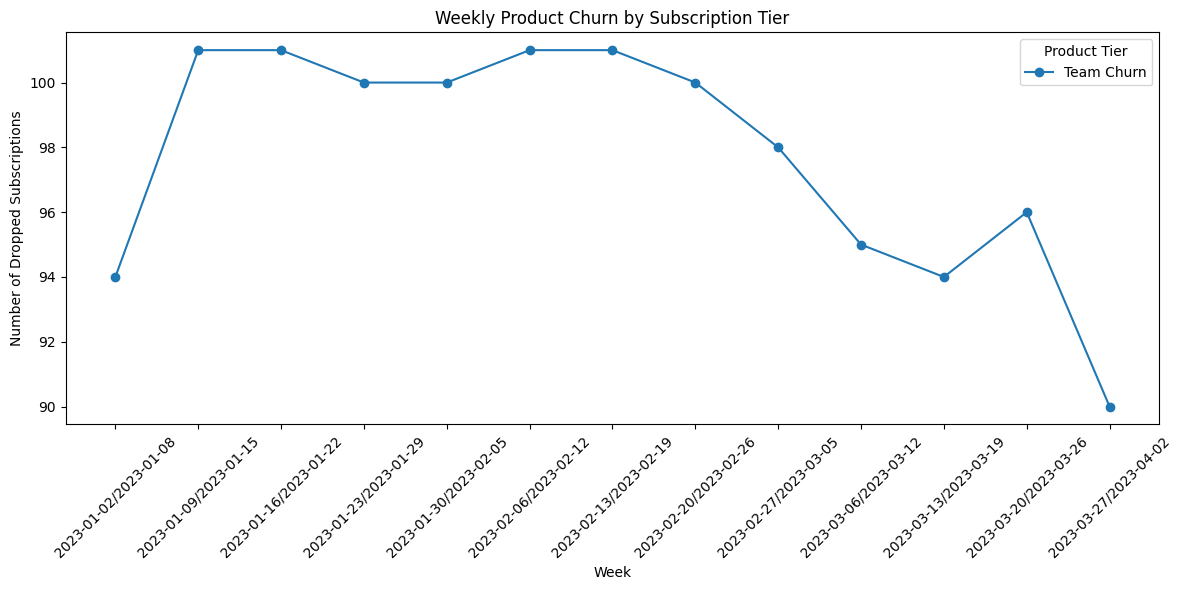

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(
    weekly_churn["year_week"],
    weekly_churn["product_churn"],
    marker="o",
    label="Team Churn",
)

plt.xlabel("Week")
plt.ylabel("Number of Dropped Subscriptions")
plt.title("Weekly Product Churn by Subscription Tier")
plt.xticks(rotation=45)
plt.legend(title="Product Tier")
plt.tight_layout()
plt.show()